# Lending Club Loan Data
## Loan Category Classifier Machine Learning

#### by: Albertus Rianto Wibisono - 28 Nov 2019

data source: https://www.kaggle.com/wendykan/lending-club-loan-data

This notebook is utilizing data obtained from the link provided above. This is a good notebook for ML amateur pracitioner to learn:
1. Visualize data using matplotlib and seaborn
2. Creating machine learning model and gradually find ways to increase the ML performance that generates the most accurate classification

A thing to note here is that this notebook runs for a long time (almost 12 minutes on my laptop) because the size of the dataset itself and the complexity of the ML model.

### 1.) Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import warnings

warnings.filterwarnings('ignore')

startall = time.time()

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format # to set the displayed data as in the two decimal format

In [2]:
start = time.time()

df = pd.read_csv('lending-club-loan-data/loan.csv', low_memory = False)

stop = time.time()
duration = stop-start
print('It took {:.2f} seconds to read the entire csv file.'.format(duration))

df.head()

It took 171.45 seconds to read the entire csv file.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,nan,nan,2500,2500,2500.00,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.00,Not Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.00,Apr-2001,1.00,nan,45.00,9.00,1.00,4341,10.30,34.00,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.00,0.00,0.00,Feb-2019,84.92,Mar-2019,Feb-2019,0.00,nan,1,Individual,nan,nan,NaN,0.00,0.00,16901.00,2.00,2.00,1.00,2.00,2.00,12560.00,69.00,2.00,7.00,2137.00,28.00,42000.00,1.00,11.00,2.00,9.00,1878.00,34360.00,5.90,0.00,0.00,140.00,212.00,1.00,1.00,0.00,1.00,nan,2.00,nan,0.00,2.00,5.00,3.00,3.00,16.00,7.00,18.00,5.00,9.00,0.00,0.00,0.00,3.00,100.00,0.00,1.00,0.00,60124.00,16901.00,36500.00,18124.00,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,nan,nan,30000,30000,30000.00,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.00,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.00,Jun-1987,0.00,71.00,75.00,13.00,1.00,12315,24.20,44.00,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.00,0.00,0.00,Feb-2019,777.23,Mar-2019,Feb-2019,0.00,nan,1,Individual,nan,nan,NaN,0.00,1208.00,321915.00,4.00,4.00,2.00,3.00,3.00,87153.00,88.00,4.00,5.00,998.00,57.00,50800.00,2.00,15.00,2.00,10.00,24763.00,13761.00,8.30,0.00,0.00,163.00,378.00,4.00,3.00,3.00,4.00,nan,4.00,nan,0.00,2.00,4.00,4.00,9.00,27.00,8.00,14.00,4.00,13.00,0.00,0.00,0.00,6.00,95.00,0.00,1.00,0.00,372872.00,99468.00,15000.00,94072.00,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,nan,nan,5000,5000,5000.00,36 mo

### 2.) Exploratory Data Analysis

In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.00,0.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260664.00,0.00,2258957.00,2260639.00,2260638.00,1102166.00,359156.00,2260639.00,2260639.00,2260668.00,2258866.00,2260639.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260668.00,2260523.00,580775.00,2260668.00,120710.00,120706.00,2260639.00,2190392.00,2190392.00,1394538.00,1394539.00,1394539.00,1394539.00,1350744.00,1394539.00,1191818.00,1394539.00,1394539.00,1394539.00,1394320.00,2190392.00,1394539.00,1394538.00,1394538.00,2210638.00,2190322.00,2185733.00,2184597.00,2260523.00,2260639.00,2121597.00,2190391.00,2190391.00,2190392.00,2210638.00,2187256.00,519701.00,1965233.00,740359.00,2190392.00,2190392.00,2190392.00,2202078.00,2190392.00,2190392.00,2190392.00,2190391.00,2190392.00,2202078.00,2107011.00,2190392.00,2190392.00,2190392.00,2190237.00,2185289.00,2259303.00,2260563.00,2190392.00,2210638.00,2210638.00,2190392.00,108020.00,108021.00,108021.00,108021.00,106184.00,108021.00,108021.00,108021.00,108021.00,35942.00,10613.00,10613.00,10613.00,10613.00,8426.00,10613.00,10613.00,33056.00,33056.00,33056.00
mean,nan,nan,15046.93,15041.66,15023.44,13.09,445.81,77992.43,nan,18.82,0.31,0.58,34.54,72.31,11.61,0.20,16658.46,50.34,24.16,4446.29,4445.29,11824.03,11805.94,9300.14,2386.35,1.46,136.07,22.59,3364.02,0.02,44.16,1.00,123624.64,19.25,0.00,232.73,142492.20,0.93,2.78,0.68,1.56,21.22,35506.65,69.14,1.29,2.75,5806.39,57.03,34573.94,1.01,1.48,2.04,4.52,13547.80,11394.26,57.90,0.01,12.37,125.74,181.49,14.02,8.30,1.56,24.84,39.30,7.02,35.78,0.50,3.68,5.63,4.77,7.73,8.41,8.25,14.00,5.58,11.63,0.00,0.00,0.08,2.08,94.11,42.44,0.13,0.05,178242.75,51022.94,23193.77,43732.01,33617.28,0.63,1.54,11.47,58.17,3.01,12.53,0.05,0.08,36.94,3.00,155.01,3.00,13.69,454.84,11628.04,193.61,5030.61,47.78,13.15
std,nan,nan,9190.25,9188.41,9192.33,4.83,267.17,112696.20,nan,14.18,0.87,0.89,21.90,26.46,5.64,0.57,22948.31,24.71,11.99,7547.61,7546.66,9889.60,9884.83,8304.89,2663.09,11.50,725.83,127.11,5971.76,0.15,21.53,0.00,74161.35,7.82,0.07,8518.46,160692.64,1.14,3.00,0.93,1.58,26.05,44097.46,23.75,1.51,2.60,5690.56,20.90,36728.50,1.49,2.67,2.38,3.16,16474.08,16599.53,28.58,0.10,726.46,53.38,97.12,17.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [5]:
# Analyzing the missing value in each columns
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': round(100*df.isnull().sum()/len(df),2)})
df_null[df_null['Count'] != 0] 

,Count,Percent
id,2260668,100.00
member_id,2260668,100.00
emp_title,166969,7.39
emp_length,146907,6.50
annual_inc,4,0.00
url,2260668,100.00
desc,2134601,94.42
title,23325,1.03
zip_code,1,0.00
dti,1711,0.08


[Text(0, 0, 'id'),
 Text(0, 0, 'url'),
 Text(0, 0, 'member_id'),
 Text(0, 0, 'orig_projected_additional_accrued_interest'),
 Text(0, 0, 'hardship_dpd'),
 Text(0, 0, 'hardship_status'),
 Text(0, 0, 'deferral_term'),
 Text(0, 0, 'hardship_amount'),
 Text(0, 0, 'hardship_start_date'),
 Text(0, 0, 'hardship_end_date'),
 Text(0, 0, 'payment_plan_start_date'),
 Text(0, 0, 'hardship_length'),
 Text(0, 0, 'hardship_loan_status'),
 Text(0, 0, 'hardship_reason'),
 Text(0, 0, 'hardship_payoff_balance_amount'),
 Text(0, 0, 'hardship_last_payment_amount'),
 Text(0, 0, 'hardship_type'),
 Text(0, 0, 'debt_settlement_flag_date'),
 Text(0, 0, 'settlement_status'),
 Text(0, 0, 'settlement_date'),
 Text(0, 0, 'settlement_amount'),
 Text(0, 0, 'settlement_percentage'),
 Text(0, 0, 'settlement_term'),
 Text(0, 0, 'sec_app_mths_since_last_major_derog'),
 Text(0, 0, 'sec_app_revol_util'),
 Text(0, 0, 'sec_app_mort_acc'),
 Text(0, 0, 'sec_app_chargeoff_within_12_mths'),
 Text(0, 0, 'sec_app_earliest_cr_line')

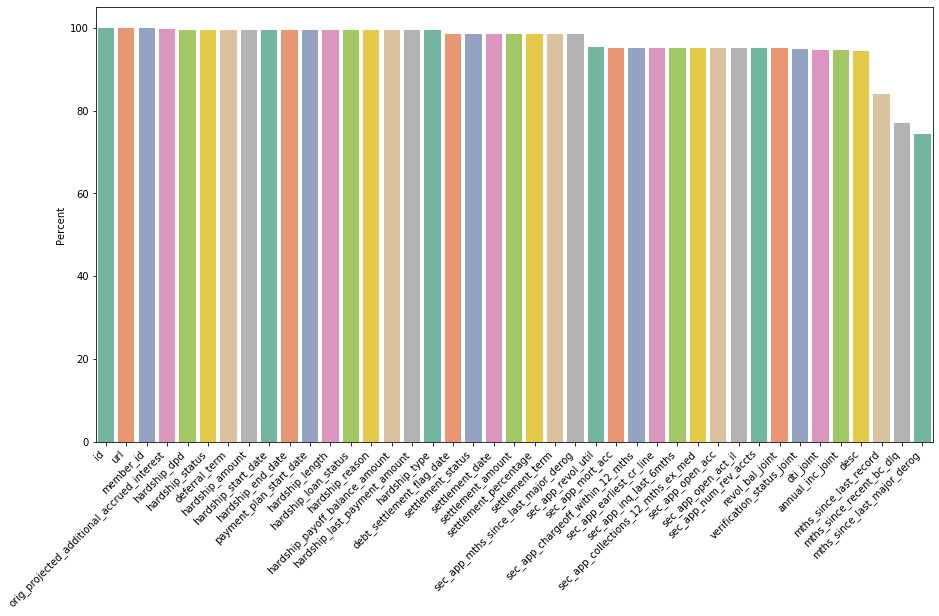

In [6]:
# Visualize the percentage of missing values in columns that have more than 70% missing values
df_null_70up = df_null[df_null['Percent'] >= 70]
df_null_70up = df_null_70up.sort_values(
    by=['Percent'], 
    ascending=False
)

plt.figure(figsize=(15,8))
barchart = sns.barplot(
    df_null_70up.index, 
    df_null_70up['Percent'],
    palette='Set2'
)

barchart.set_xticklabels(barchart.get_xticklabels(), rotation=45, horizontalalignment='right')

Columns with total misisng values more than 70% would be unnecessary for further analysis and might eventually lead to a inaccurate result in the final model

In [7]:
# Remove columns which missing values > 70%
df_1 = df.dropna(axis=1, thresh=int(0.70*len(df)))
df_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.00,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.00,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.00,Apr-2001,1.00,9.00,1.00,4341,10.30,34.00,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.00,0.00,0.00,Feb-2019,84.92,Feb-2019,0.00,1,Individual,0.00,0.00,16901.00,42000.00,9.00,1878.00,34360.00,5.90,0.00,0.00,140.00,212.00,1.00,1.00,0.00,1.00,2.00,0.00,2.00,5.00,3.00,3.00,16.00,7.00,18.00,5.00,9.00,0.00,0.00,0.00,3.00,100.00,0.00,1.00,0.00,60124.00,16901.00,36500.00,18124.00,N,Cash,N
1,30000,30000,30000.00,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.00,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.00,Jun-1987,0.00,13.00,1.00,12315,24.20,44.00,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.00,0.00,0.00,Feb-2019,777.23,Feb-2019,0.00,1,Individual,0.00,1208.00,321915.00,50800.00,10.00,24763.00,13761.00,8.30,0.00,0.00,163.00,378.00,4.00,3.00,3.00,4.00,4.00,0.00,2.00,4.00,4.00,9.00,27.00,8.00,14.00,4.00,13.00,0.00,0.00,0.00,6.00,95.00,0.00,1.00,0.00,372872.00,99468.00,15000.00,94072.00,N,Cash,N
2,5000,5000,5000.00,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.00,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.00,Apr-2011,0.00,8.00,0.00,4599,19.10,13.00,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.00,0.00,0.00,Feb-2019,180.69,Feb-2019,0.00,1,Individual,0.00,0.00,110299.00,24100.00,4.00,18383.00,13800.00,0.00,0.00,0.00,87.00,92.00,15.00,14.00,2.00,77.00,14.00,0.00,0.00,3.00,3.00,3.00,4.00,6.00,7.00,3.00,8.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,136927.00,11749.00,13800.00,10000.00,N,Cash,N
3,4000,4000,4000.00,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.00,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.00,Feb-2006,0.00,10.00,0.00,5468,78.10,13.00,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.00,0.00,0.00,Feb-2019,146.51,Feb-2019,0.00,1,Individual,0.00,686.00,305049.00,7000.00,5.00,30505.00,1239.00,75.20,0.00,0.00,62.00,154.00,64.00,5.00,3.00,64.00,5.00,0.00,1.00,2.00,1.00,2.00,7.00,2.00,3.00,2.00,10.00,0.00,0.00,0.00,3.00,100.00,100.00,0.00,0.00,385183.00,36151.00,5000.00,44984.00,N,Cash,N
4,30000,30000,30000.00,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.00,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.00,Dec-2000,0.00,12.00,0.00,829,3.60,26.00,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.00,0.00,0.00,Feb-2019,731.78,Feb-2019,0.00,1,Individual,0.00,0.00,116007.00,23100.00,9.00,9667.00,8471.00,8.90,0.00,0.00,53.00,216.00,2.00,2.00,2.00,2.00,13.00,0.00,2.00,2.00,3.00,8.00,9.00,6.

In [8]:
print(
    'The number of columns has reduced from {} to {} columns by removing columns with 70% missing values'.
    format(len(df.columns), len(df_1.columns))
)

The number of columns has reduced from 145 to 87 columns by removing columns with 70% missing values


### 3.) Data Visualization 

**3.1. Loan Status**

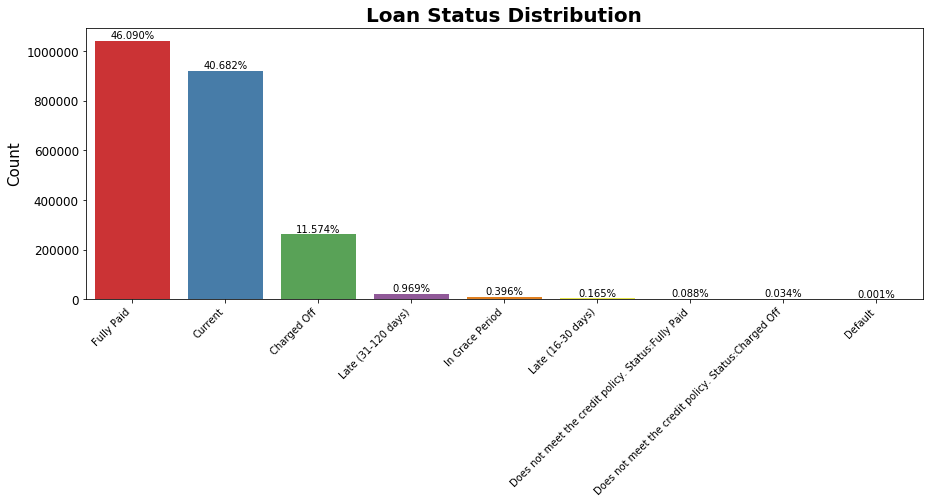

In [9]:
plt.figure(figsize = (15,5))
plot1 = sns.barplot(df.loan_status.value_counts().index, df.loan_status.value_counts(), palette = 'Set1')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.yticks(fontsize = 12)
plt.title("Loan Status Distribution", fontsize = 20, weight='bold')
plt.ylabel("Count", fontsize = 15)

total = len(df_1)
sizes = []
for p in plot1.patches:
    height = p.get_height()
    sizes.append(height)
    plot1.text(p.get_x() + p.get_width()/2.,
            height + 10000,
            '{:1.3f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 10) 

Based on the existing loan_status, I will choose only rows which loan status = ('fully paid', 'default', 'charged off') in order to easily categorize them into *good* or *bad* loans.

In [10]:
selected_loan_status = ['Fully Paid', 'Charged Off', 'Default']
df_2 = df_1[df_1.loan_status.isin(selected_loan_status)]
df_2.loan_status = df_2.loan_status.replace({'Fully Paid' : 'Good Loan'})
df_2.loan_status = df_2.loan_status.replace({'Charged Off' : 'Bad Loan'})
df_2.loan_status = df_2.loan_status.replace({'Default' : 'Bad Loan'})

In [11]:
print(
    'The number of rows has been reduced from {:,.0f} to {:,.0f} by filtering the data with the correlated loan status'.
    format(len(df_1), len(df_2))     
)

The number of rows has been reduced from 2,260,668 to 1,303,638 by filtering the data with the correlated loan status


**3.2. Loan's Term**

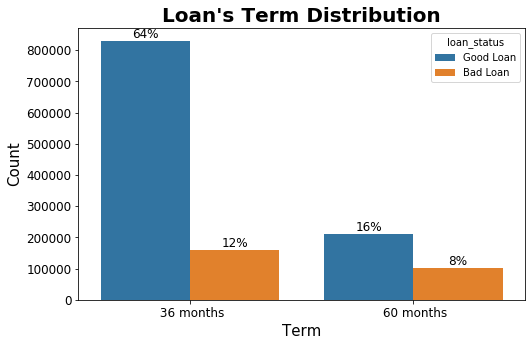

In [12]:
plt.figure(figsize=(8, 5))
plot2 = sns.countplot(df_2.term, hue = df_2.loan_status)
plt.title("Loan's Term Distribution", fontsize = 20, weight='bold')
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Term", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

total = len(df_2)
sizes = []
for p in plot2.patches:
    height = p.get_height()
    sizes.append(height)
    plot2.text(p.get_x() + p.get_width()/2.,
            height + 10000,
            '{:1.0f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 12) 

From the graph above, it can be noted that more borrowers in Lending Club are using 36 months loan's term. It is also important to see that while fewer people using 60 months loan's term, but one third of them is categorised as *bad loan* while only 16% of the total borrowers who use 36 months loan's term is considered as *bad*.

**3.3. Loan Amount**

(array([0.e+00, 1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05,
        8.e-05, 9.e-05]), <a list of 10 Text yticklabel objects>)

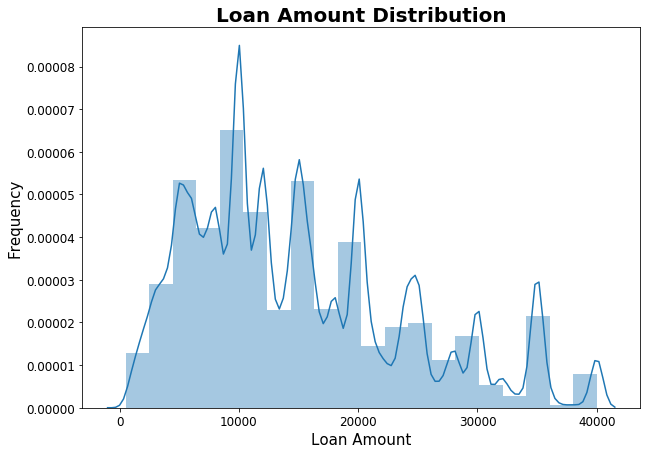

In [13]:
plt.figure(figsize = (10,7))
sns.distplot(df.loan_amnt, bins=20)
plt.title('Loan Amount Distribution', fontsize = 20, weight='bold')
plt.xlabel('Loan Amount', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

**3.4. Interest Rate**

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 6 Text yticklabel objects>)

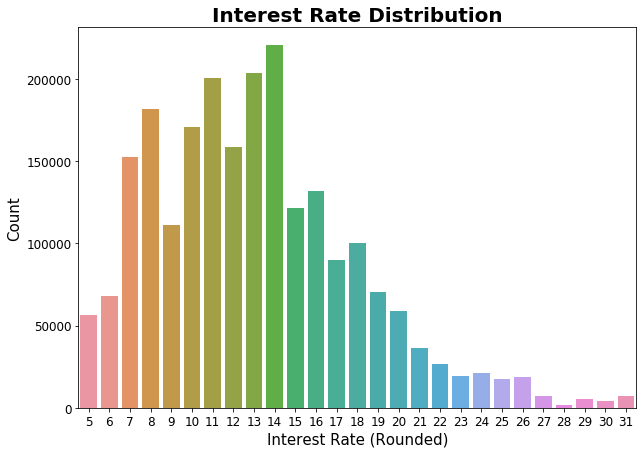

In [14]:
plt.figure(figsize = (10,7))
sns.countplot(round(df.int_rate, 0).astype(int))
plt.title('Interest Rate Distribution', fontsize = 20, weight='bold')
plt.xlabel('Interest Rate (Rounded)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

It can be inferred that many loan done in Lending Club has interest rate lies between 7-18 %

**3.5. Grade**

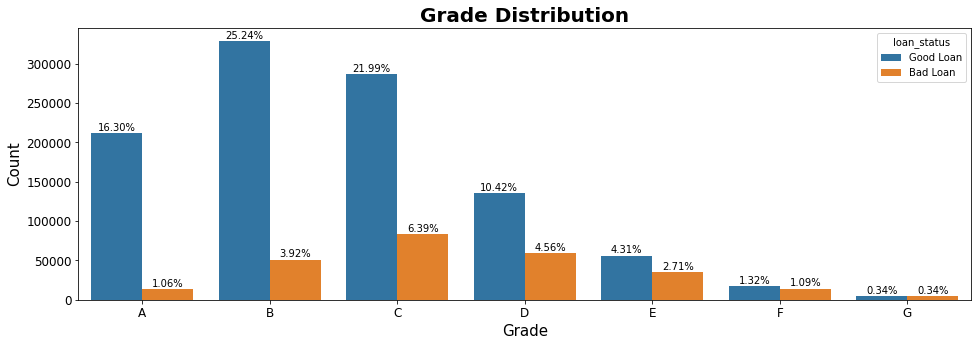

In [15]:
plt.figure(figsize = (16,5))
plot3 = sns.countplot(df_2.sort_values(by='grade').grade, hue = df_2.loan_status)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Grade Distribution", fontsize = 20, weight='bold')
plt.xlabel("Grade", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

total = len(df_2)
sizes = []
for p in plot3.patches:
    height = p.get_height()
    sizes.append(height)
    plot3.text(p.get_x() + p.get_width()/2.,
            height + 3000,
            '{:1.2f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 10) 

From the chart above we see that as the grade is degrading, more loans are categorised as *bad* rather than *good*, which is reasonable because a lower grade means that the risk of defaulting is also increasing

**3.6. Loan Purpose**

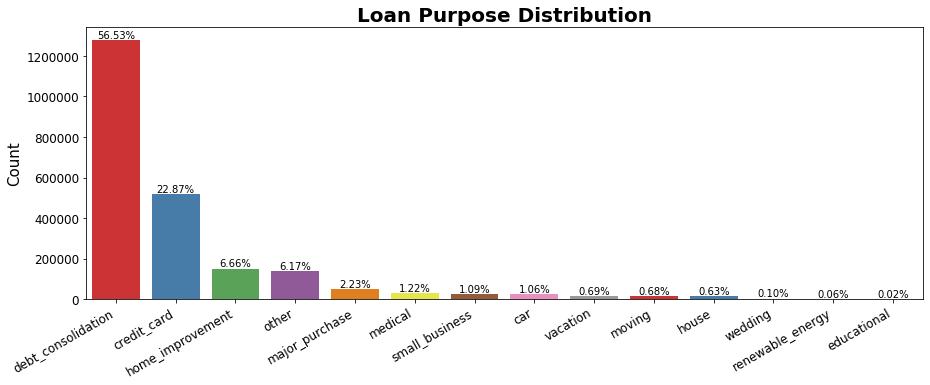

In [16]:
plt.figure(figsize = (15,5))
plot4 = sns.barplot(df.purpose.value_counts().index, df.purpose.value_counts(), palette = 'Set1')
plt.xticks(rotation = 30, fontsize = 12, horizontalalignment='right')
plt.yticks(fontsize = 12)
plt.title("Loan Purpose Distribution", fontsize = 20, weight='bold')
plt.ylabel("Count", fontsize = 15)

total = len(df_1)
sizes = []
for p in plot4.patches:
    height = p.get_height()
    sizes.append(height)
    plot4.text(p.get_x() + p.get_width()/2.,
            height + 10000,
            '{:1.2f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 10) 

It can be inferred that almost 80% of borrower in Lending Club has the purpose to re-pay their previous debt

**3.7. Loan Status Distribution based by Loan Amount and Interest Rate**

Text(0.5, 1.0, 'Loan Status by Loan Amount')

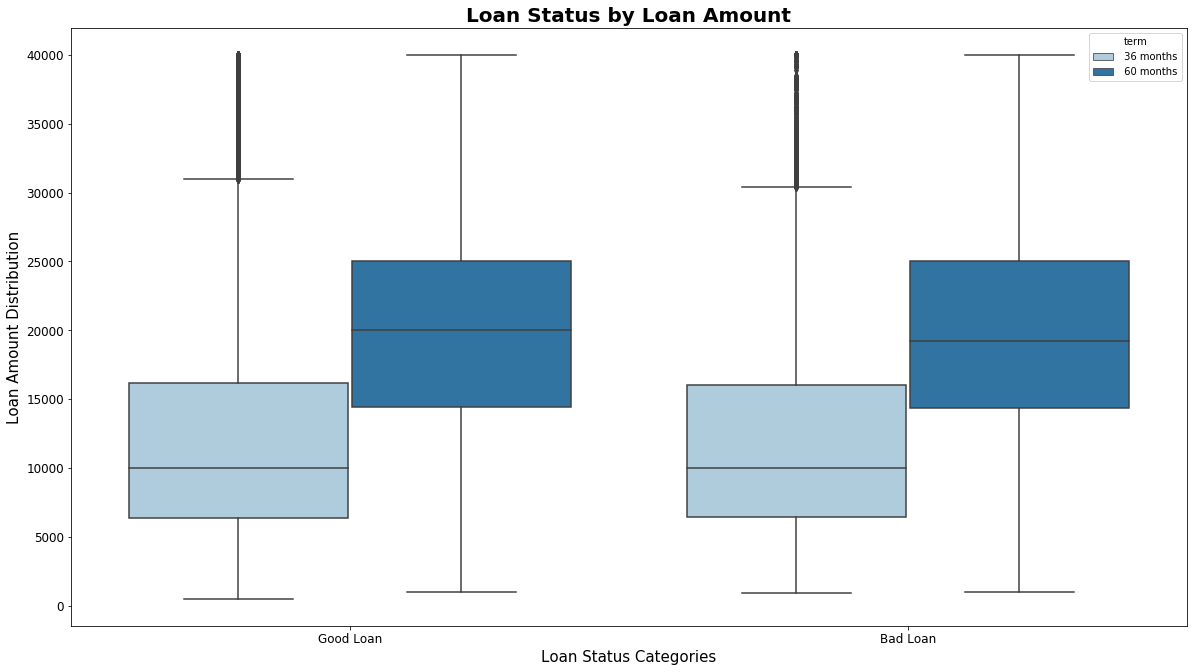

In [17]:
plt.figure(figsize = (20,11))
sns.boxplot(df_2.loan_status, df_2.loan_amnt, hue = df_2.term, palette = 'Paired')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Loan Status Categories", fontsize = 15)
plt.ylabel("Loan Amount Distribution", fontsize = 15)
plt.title("Loan Status by Loan Amount", fontsize = 20, weight='bold')

A nice thing to note here is that either *bad loan* and *good loan* has relatively the same loan amount (for both loan's terms). Except for good loan with 60 months terms, the amount average is slightly higher compared to the bad loan's average number. This means that the amount of loan alone can't necessarily predict the category of the loan.

Text(0.5, 1.0, 'Loan Status by Interest Rate')

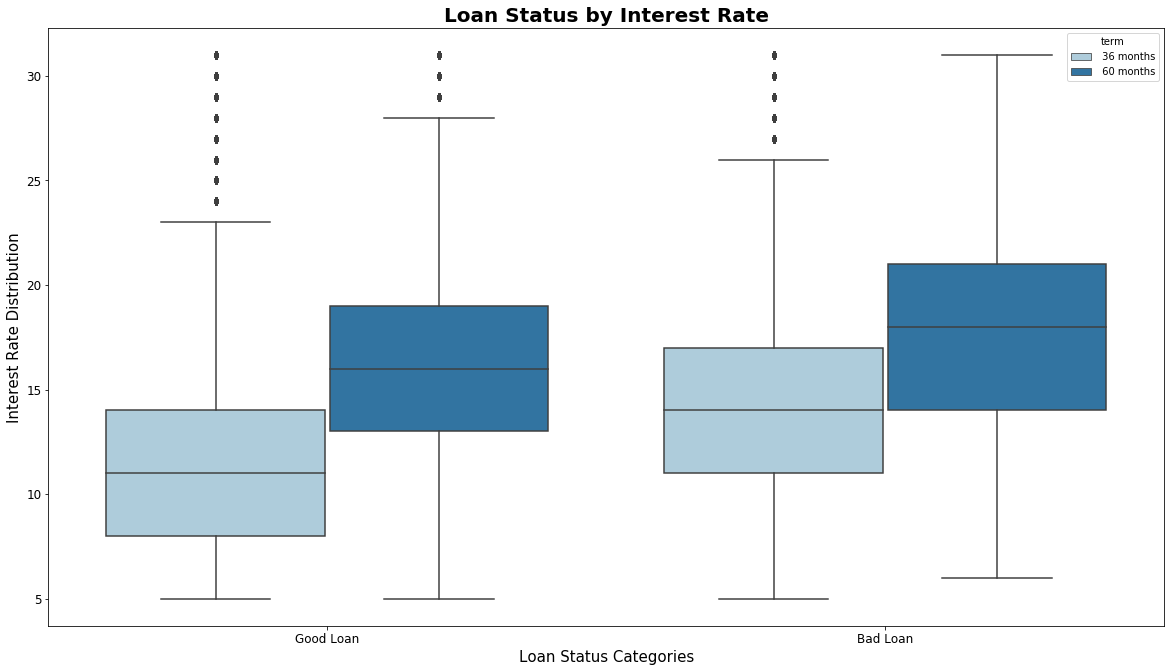

In [18]:
plt.figure(figsize = (20,11))
sns.boxplot(df_2.loan_status, round(df_2.int_rate, 0).astype(int), hue = df_2.term, palette = 'Paired')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Loan Status Categories", fontsize = 15)
plt.ylabel("Interest Rate Distribution", fontsize = 15)
plt.title("Loan Status by Interest Rate", fontsize = 20, weight='bold')

The graphic above shows that *bad loan* has relatively higher interest rate compared to *good loan*. This means that with higher interest rate, borrowers are more unlikely to repay their debt, and this is totally reasonable.

**3.8. Verification Status**

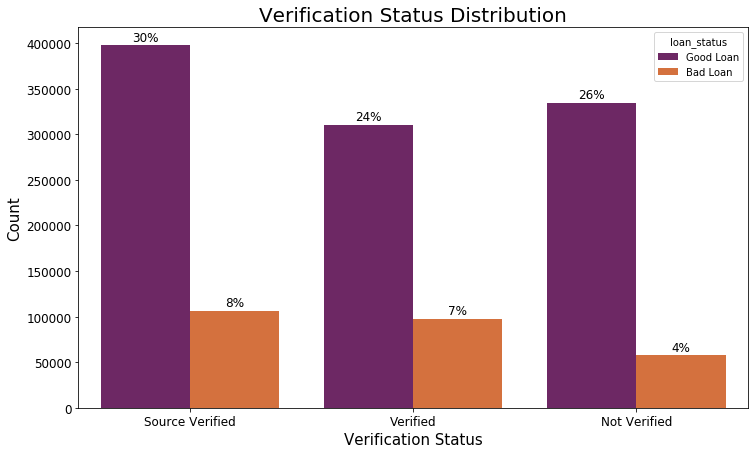

In [19]:
plt.figure(figsize=(12, 7))
plot5 = sns.countplot(df_2.verification_status, hue = df_2.loan_status, palette = 'inferno')
plt.title("Verification Status Distribution", fontsize = 20)
plt.xlabel("Verification Status", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

total = len(df_2)
sizes = []
for p in plot5.patches:
    height = p.get_height()
    sizes.append(height)
    plot5.text(p.get_x() + p.get_width()/2.,
            height + 5000,
            '{:1.0f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 12)

By comparing the height of the bar of good and bad loan for each verification status, we can imply that **'verified'** status has the biggest percentage of bad loan (almost 30%). Somehow, this doesn't make sense in the first place. This might create a misleading conclusion that '*verification status'* might not be the best consideration to predict the loan's quality.

**3.9. Top 20 Job Titles for Each Grades**

In [20]:
most_emp_title = df_2.emp_title.value_counts()[:20].index.values  # get the top 20 most frequent employee job title
cm = sns.light_palette("orange", as_cmap=True)

round(pd.crosstab(df_2[df_2['emp_title'].isin(most_emp_title)]['emp_title'], 
                  df_2[df_2['emp_title'].isin(most_emp_title)]['grade'], 
                  normalize='index') * 100,2).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
emp_title,,,,,,,
Director,24.99,29.17,26.29,11.71,5.55,1.81,0.47
Driver,12.66,28.28,30.1,17.72,7.87,2.53,0.84
Engineer,24.63,28.5,26.22,11.93,5.64,2.42,0.68
General Manager,17.51,29.82,29.16,13.92,6.62,2.23,0.72
Manager,16.91,28.18,29.77,14.77,7.11,2.39,0.87
Office Manager,16.37,28.79,29.71,15.15,7.05,2.36,0.56
Operations Manager,16.67,28.82,29.44,15.02,7.21,2.24,0.6
Owner,20.52,29.76,26.7,14.08,6.22,2,0.71
President,27.72,28.4,25.34,11.52,5.08,1.38,0.55


The crosstab functions builds a cross-tabulation table that can show the frequency with which certain groups of data appear.
From the visualization above, we can see that for loans with grade **'A'**, the most frequent borrowers are employee with job titles = ('Director', 'Engineer', 'President', 'Vice President') and other high-paying job titles. This means that these job titles have a lower risk of defaulting so that their loans is graded higher, which is reasonable. 

### 4.) Machine Learning

#### 4.A) First Trial

For the first trial, I'm gonna select data with only potentially related features. To filter the dataframe with this method, one has to really understand the business knowledge behing the data very well. 

The fewer number of column is, means that the model running time will also be faster. 

In [21]:
df_3 = df_2[[
    'loan_status', 'term','int_rate',
    'installment','grade', 'annual_inc',
    'verification_status','dti'  # These features are just initial guess, you can try to choose any other combination
]]
df_3.head()

,loan_status,term,int_rate,installment,grade,annual_inc,verification_status,dti
100,Good Loan,36 months,22.35,1151.16,D,100000.00,Source Verified,30.46
152,Good Loan,60 months,16.14,975.71,C,45000.00,Verified,50.53
170,Good Loan,36 months,7.56,622.68,A,100000.00,Not Verified,18.92
186,Good Loan,36 months,11.31,147.99,B,38500.00,Not Verified,4.64
215,Good Loan,36 months,27.27,345.18,E,450000.00,Verified,12.37


In [22]:
# Find missing values in the chosen columns
df_null = pd.DataFrame({'Count': df_3.isnull().sum(), 'Percent': round(100*df_3.isnull().sum()/len(df_3),2)})
df_null[df_null['Count'] != 0] 

,Count,Percent
dti,312,0.02


In [23]:
# Dropping rows with null values
df_clean = df_3.dropna(axis = 0)

In [24]:
print('Number of dropped rows: {} rows'.format(len(df_3)-len(df_clean)))

Number of dropped rows: 312 rows


In [25]:
# The next step is to transform categorical target variable into integer
df_clean.loan_status = df_clean.loan_status.replace({'Good Loan' : 1})
df_clean.loan_status = df_clean.loan_status.replace({'Bad Loan' : 0})
df_clean.loan_status.unique()

array([1, 0])

We also have to transform categorical feature columns using *one hot encoding*

In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_clean['term'] = label.fit_transform(df_clean['term'])
df_clean['grade'] = label.fit_transform(df_clean['grade'])
df_clean['verification_status'] = label.fit_transform(df_clean['verification_status'])

Split data into target column (x) and features (y)

In [27]:
x = df_clean.drop(['loan_status'], axis=1)
y = df_clean['loan_status']

Using *OneHotEncoder* to transform categorical columns: loan_term, loan_grade, verification_status

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np 

coltrans = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,3,5])],      # 0,3,5 refers to the column indexes that need to be transformed      
    remainder = 'passthrough'                               
)                                                         

x = np.array(coltrans.fit_transform(x))

The next step is, splitting data into training and testing data

In [29]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(
    x,
    y,
    test_size = .2
)

In [30]:
print(ytr.value_counts())
print(yts.value_counts())

1    833396
0    209264
Name: loan_status, dtype: int64
1    208306
0     52360
Name: loan_status, dtype: int64


If we look to the loan status distribution above, it is clearly noted that the data set is unbalanced, where the amount of *bad* loan is far fewer than than the *good* one.

An imbalanced data can result in inaccurate / biased classifications of the final output. Therefore, before fitting the data into the machine learning model, we need to rebalance the data with a method called SMOTE (Synthetic Minority Oversampling Technique).

In [31]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
xtr_2, ytr_2 = smt.fit_sample(xtr, ytr)

In [32]:
np.bincount(ytr_2)

array([833396, 833396])

Here we can see that after SMOTE function runs, the number of 'good' and 'bad' loan has been balanced.

**Fitting into Machine Learning Model**

Random Forest is the most common method used for classification algorithm. Although it has a risk to overfit the data, but it has been prominent to solve cases with classification output.

In [33]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

model = RandomForestClassifier()
model.fit(xtr_2, ytr_2)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 60.65 seconds.


In [34]:
print(round(model.score(xts, yts) * 100, 2), '%')

74.67 %


While the model gives a good accuracy score, it's better to see the **classification report** and **confusion matrix** to really see how good the model performance is in classifying both classes.

In [35]:
y_pred = model.predict(xts)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yts, y_pred)

array([[ 13481,  38879],
       [ 27160, 181146]])

In [37]:
pd.crosstab(yts, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,13481,38879,52360
1,27160,181146,208306
All,40641,220025,260666


In [38]:
from sklearn.metrics import classification_report

target_names = ['Bad Loan', 'Good Loan']
print(classification_report(yts, model.predict(xts), target_names=target_names))

              precision    recall  f1-score   support

    Bad Loan       0.33      0.26      0.29     52360
   Good Loan       0.82      0.87      0.85    208306

    accuracy                           0.75    260666
   macro avg       0.58      0.56      0.57    260666
weighted avg       0.72      0.75      0.73    260666



From the confusion matrix and classification report above, we can really see that the model is biased toward good loan. It runs pretty good at predicting good loan, but it performs really bad at predicting the bad loan (from all 52k actual bad loans, the model predicted only less than half of them right --> 13k)

#### 4.B.) Second Trial

In this second trial, I want to try fitting the ML model using the unbalanced dataset (without applying SMOTE) to see if it really impactful to the final performance of the model. Using the same steps from the first trial...

In [39]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

model2 = RandomForestClassifier()
model2.fit(xtr, ytr)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 31.97 seconds.


In [40]:
print(round(model2.score(xts, yts) * 100, 2), '%')

75.83 %


In [41]:
y_pred2 = model2.predict(xts)

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yts, y_pred2)

array([[ 11273,  41087],
       [ 21905, 186401]])

In [43]:
pd.crosstab(yts, y_pred2, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,11273,41087,52360
1,21905,186401,208306
All,33178,227488,260666


In [44]:
from sklearn.metrics import classification_report

target_names = ['Bad Loan', 'Good Loan']
print(classification_report(yts, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

    Bad Loan       0.34      0.22      0.26     52360
   Good Loan       0.82      0.89      0.86    208306

    accuracy                           0.76    260666
   macro avg       0.58      0.56      0.56    260666
weighted avg       0.72      0.76      0.74    260666



It seems that the accuracy score gives a slightly higher score compared to the first trial with balanced dataset. But, it also has to be noted that the model shows a worse performance at predicting *good loan* (look at the decreasing classification report scores).

#### 4.C.) Third Trial

Another method to deal with unbalanced dataset is by applying NearMiss to perform undersampling in order to also get a balanced dataset.

In [45]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()
xtr_3, ytr_3 = nr.fit_sample(xtr, ytr)

In [46]:
np.bincount(ytr_3)

array([209264, 209264])

In [47]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

model3 = RandomForestClassifier()
model3.fit(xtr_3, ytr_3)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 8.34 seconds.


In [48]:
print(round(model3.score(xts, yts) * 100, 2), '%')

43.95 %


In [49]:
y_pred3 = model3.predict(xts)

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yts, y_pred3)

array([[ 37755,  14605],
       [131507,  76799]])

In [51]:
pd.crosstab(yts, y_pred3, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,37755,14605,52360
1,131507,76799,208306
All,169262,91404,260666


In [52]:
from sklearn.metrics import classification_report

target_names = ['Bad Loan', 'Good Loan']
print(classification_report(yts, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

    Bad Loan       0.22      0.72      0.34     52360
   Good Loan       0.84      0.37      0.51    208306

    accuracy                           0.44    260666
   macro avg       0.53      0.54      0.43    260666
weighted avg       0.72      0.44      0.48    260666



For the classification report generated from this first trial, it seems that undersampling method increase the performance of the ML model to predcit bad loan, but it decreases the performance to predict good loan significantly. As a result, the accuracy score is just as bad.

So far, we haven't been able to increase the performance of the ML model.

#### 4.D.) Fourth Trial

Another way to increase ML model performance is by doing hyperparameter tuning, but this is not what I'm gonna do in this notebook.

Therefore, we could also re-consider the features we have filtered earlier. Beside using domain knowledge, it is also better to choose the features **objectively** by looking at the correlation for each features toward the target variable (loan_status).

Features can be in form of number (float/integer) or string (object). For categorical features, we also have to one-hot-encoded it first before fitting into the dataset. Choosing a categorical feature which have too many options will only causing the matrix becoming too large and difficult to handle by the computer.

In [53]:
# First, by knowing what are the features available in the dataframe
df_4 = df_2

In [54]:
# The next step is to transform categorical target variable into integer
df_4.loan_status = df_4.loan_status.replace({'Good Loan' : 1})
df_4.loan_status = df_4.loan_status.replace({'Bad Loan' : 0})

In [55]:
df_4.columns.to_series().groupby(df_clean.dtypes).groups

{dtype('int64'): Index(['term', 'grade', 'verification_status', 'loan_status'], dtype='object'),
 dtype('float64'): Index(['int_rate', 'installment', 'annual_inc', 'dti'], dtype='object')}

In [56]:
# First, dropping categorical features (object type) which have too many options available
df_4 = df_4.drop(['emp_title', 'sub_grade', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'hardship_flag', 'debt_settlement_flag'], axis=1)

In [57]:
# Second, to filter numerical features, we can use .corr() function to select only features with high correlation to the target variable
df_4.corr()['loan_status']

loan_amnt                    -0.07
funded_amnt                  -0.07
funded_amnt_inv              -0.07
int_rate                     -0.26
installment                  -0.05
annual_inc                    0.04
loan_status                   1.00
dti                          -0.09
delinq_2yrs                  -0.02
inq_last_6mths               -0.07
open_acc                     -0.03
pub_rec                      -0.03
revol_bal                     0.02
revol_util                   -0.06
total_acc                     0.01
out_prncp                    -0.01
out_prncp_inv                -0.01
total_pymnt                   0.32
total_pymnt_inv               0.32
total_rec_prncp               0.44
total_rec_int                -0.06
total_rec_late_fee           -0.14
recoveries                   -0.50
collection_recovery_fee      -0.47
last_pymnt_amnt               0.35
collections_12_mths_ex_med   -0.02
policy_code                    nan
acc_now_delinq               -0.00
tot_coll_amt        

In [58]:
df_clean = df_4[[
    'loan_status', # target variable
    # features (object):
    'term', 'grade','home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
    'initial_list_status', 'application_type', 'disbursement_method',
    # features (int/float):
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'recoveries',                   
    'collection_recovery_fee', 'last_pymnt_amnt', 'int_rate'
]]

In [59]:
df_null = pd.DataFrame({'Count': df_clean.isnull().sum(), 'Percent': round(100*df_clean.isnull().sum()/len(df_clean),2)})
df_null[df_null['Count'] != 0] 

,Count,Percent


It's good that there's no missing values

In [60]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_clean['term'] = label.fit_transform(df_clean['term'])
df_clean['grade'] = label.fit_transform(df_clean['grade'])
# df_clean['emp_length'] = label.fit_transform(df_clean['emp_length'])
df_clean['home_ownership'] = label.fit_transform(df_clean['home_ownership'])
df_clean['verification_status'] = label.fit_transform(df_clean['verification_status'])
df_clean['pymnt_plan'] = label.fit_transform(df_clean['pymnt_plan'])
df_clean['purpose'] = label.fit_transform(df_clean['purpose'])
df_clean['initial_list_status'] = label.fit_transform(df_clean['initial_list_status'])
df_clean['application_type'] = label.fit_transform(df_clean['application_type'])
df_clean['disbursement_method'] = label.fit_transform(df_clean['disbursement_method'])

In [61]:
df_clean.head()

,loan_status,term,grade,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,disbursement_method,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,int_rate
100,1,0,3,1,1,0,2,1,1,0,30026.44,30026.44,30000.00,0.00,0.00,30082.32,22.35
152,1,1,2,1,2,0,1,1,1,0,40856.68,40856.68,40000.00,0.00,0.00,40910.48,16.14
170,1,0,0,1,0,0,1,1,1,0,20215.79,20215.79,20000.00,0.00,0.00,20228.39,7.56
186,1,0,1,5,0,0,1,1,0,0,4549.22,4549.22,4500.00,0.00,0.00,4553.46,11.31
215,1,0,4,1,2,0,1,1,1,0,8735.15,8735.15,8425.00,0.00,0.00,8754.30,27.27


In [62]:
x = df_clean.drop(['loan_status'], axis=1)
y = df_clean['loan_status']

In [63]:
x.head()

,term,grade,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,disbursement_method,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,int_rate
100,0,3,1,1,0,2,1,1,0,30026.44,30026.44,30000.00,0.00,0.00,30082.32,22.35
152,1,2,1,2,0,1,1,1,0,40856.68,40856.68,40000.00,0.00,0.00,40910.48,16.14
170,0,0,1,0,0,1,1,1,0,20215.79,20215.79,20000.00,0.00,0.00,20228.39,7.56
186,0,1,5,0,0,1,1,0,0,4549.22,4549.22,4500.00,0.00,0.00,4553.46,11.31
215,0,4,1,2,0,1,1,1,0,8735.15,8735.15,8425.00,0.00,0.00,8754.30,27.27


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np 

coltrans = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1,2,3,4,5,6,7,8])],        
    remainder = 'passthrough'                               
)                                                         

x = np.array(coltrans.fit_transform(x))

In [65]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(
    x,
    y,
    test_size = .2
)

In [66]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()

model = RandomForestClassifier()
model.fit(xtr, ytr)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 36.91 seconds.


In [67]:
print(round(model.score(xts, yts) * 100, 2), '%')

98.98 %


In [68]:
y_pred = model.predict(xts)

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yts, y_pred)

array([[ 50210,   1917],
       [   733, 207868]])

In [70]:
pd.crosstab(yts, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,50210,1917,52127
1,733,207868,208601
All,50943,209785,260728


In [71]:
from sklearn.metrics import classification_report

target_names = ['Bad Loan', 'Good Loan']
print(classification_report(yts, model.predict(xts), target_names=target_names))

              precision    recall  f1-score   support

    Bad Loan       0.99      0.96      0.97     52127
   Good Loan       0.99      1.00      0.99    208601

    accuracy                           0.99    260728
   macro avg       0.99      0.98      0.98    260728
weighted avg       0.99      0.99      0.99    260728



Finally, the fourth trial shows the best result from the ML model in predicting loan's classification. Beside generating a good accuracy score, the classification report also shows a magnificent result for both classification.

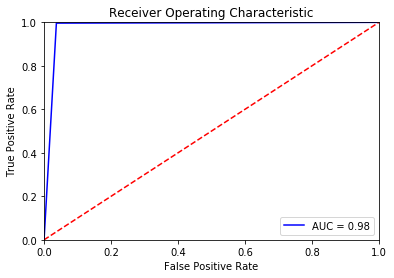

In [72]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(xts)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(yts, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It even shows a good AUC ROC score!

In [73]:
import math

stopall = time.time()
durationall = stopall-startall
duration_mins = math.floor(durationall/60)
duration_secs = durationall - (duration_mins*60)

print('The whole notebook runs for {} minutes {:.2f} seconds.'.format(duration_mins, duration_secs))

The whole notebook runs for 9 minutes 27.75 seconds.
